#### Importamos las librerías necesarias para el análisis

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

#### De nuevo, usaremos la base de datos Iris

In [33]:
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
# iris = pd.read_csv(url, names=names)
iris = sns.load_dataset('iris')

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [34]:
iris = iris.select_dtypes(include=[np.number])


El nivel de significancia se refiere al valor total de ambas colas en un intervalo de confianza.

En un intervalo de confianza bilateral (dos colas), el nivel de significancia se distribuye por igual en ambas colas de la distribución. Por ejemplo, si tienes un nivel de confianza del 80%, significa que tienes un 10% en cada cola de los datos, sumando un total de 20% para el nivel de significancia.

En este caso, el nivel de significancia sería del 20% porque estás considerando tanto el extremo inferior (10%) como el extremo superior (10%) del intervalo de confianza.

## Tipos de pruebas:

el código está calculando el error estándar de la longitud del sépalo en el conjunto de datos "iris"

El error estándar se calcula dividiendo la desviación estándar de las longitudes del sépalo por la raíz cuadrada del tamaño de la muestra.

### a) Distribución t de Student

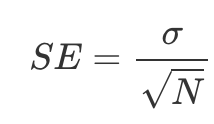

In [35]:
se_length=iris.std()['sepal_length']/np.sqrt(10)
se_width=iris.std()['sepal_width']/np.sqrt(10)

![Captura de pantalla ](/home/roy/Estadistica_inferencial/img/formula.png)

In [36]:
sed=np.sqrt((se_length**2) + (se_width**2))

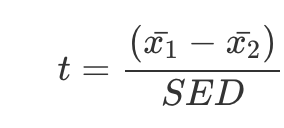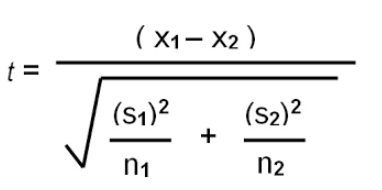

In [37]:
t_stat=(iris.mean()['sepal_length'] - iris.mean()['sepal_width'])/sed
t_stat #= 9.41


9.414779428410265

In [38]:
p = ttest_ind(iris['sepal_length'], iris['sepal_width'])
p #= 7.02 
# en este caso el valor t es mayor que el pvalue lo que nos dice que podemos 
# descartar nuestra hipotesis nula
# que nos dice que la distrubucion de ambas variables fueran muy similares 
# por lo tanto nos podemos ir por nuestra
# hipotesis altenativa 
# si el valor t fuera menor que el p value significa que su distribucion de las 2 variables 
# es muy similar por lo tanto aceptariamos la hipotesis nula 

Ttest_indResult(statistic=36.463283934449116, pvalue=7.027919392009369e-112)

El valor absoluto del valor t es mayor que el valor crítico, entonces rechazamos la hipótesis nula

### b) Correlación y coeficiente de Pearson

In [42]:
# Estudiamos la correlación entre length y width
iris['sepal_length'].corr(iris['sepal_width'])

# en este caso es -0.11 lo que indica que hay una correlacion debil negativa

-0.11756978413300208

en el coeficiente de correlación de Pearson, un valor de 1 indica una correlación positiva perfecta, un valor de -1 indica una correlación negativa perfecta y un valor de 0 indica una correlación nula o ausencia de relación lineal.

In [43]:
# A continuación, estudiamos la correlación de Pearson entre ambas variables
st.pearsonr(iris['sepal_length'], iris['sepal_width'])

# PearsonRResult(statistic=-0.11756978413300204, pvalue=0.15189826071144918)
# nos muestra la correlacion y pvalue

PearsonRResult(statistic=-0.11756978413300204, pvalue=0.15189826071144918)

 si el valor de p es mayor que el nivel de significancia (por ejemplo, p > 0.05), no podemos descartar la hipótesis nula y no se puede afirmar una correlación significativa. Si el valor de p es menor que el nivel de significancia (por ejemplo, p < 0.05), podríamos rechazar la hipótesis nula y concluir que hay evidencia de una correlación significativa.

Correlación débil o inexistente

### c) Análisis de la varianza (ANOVA)

El Análisis de la Varianza (ANOVA) es una técnica estadística utilizada para comparar las medias de tres o más grupos diferentes y determinar si hay diferencias significativas entre ellos. El ANOVA examina la variación dentro de cada grupo y la variación entre los grupos para realizar inferencias sobre la población en general.

El test ANOVA considera suposiciones importantes que deben cumplirse para que el valor p asociado sea válido:

Las muestras son independientes.

Cada muestra es de una población normalmente distribuida.

Las desviaciones estándar de población de los grupos son todas iguales. Esta propiedad se conoce como homocedasticidad.

In [41]:
f_oneway(iris['sepal_length'], iris['sepal_width'])

F_onewayResult(statistic=1329.571075284254, pvalue=7.027919392009998e-112)

F Test es 1329.571075284254 y su pvalue correspondiente es 7.027919392009998e-112. Dado que es un número inferior a 0.05 mo rechazamos la hipótesis nula de que las medias entre variables son similares 

En el estadístico F del ANOVA, un valor grande indica que hay una mayor diferencia entre las medias de los grupos en relación con la variabilidad dentro de los grupos. Es decir, un valor grande indica que existe una mayor variación entre los grupos en comparación con la variación dentro de los grupos. Sin embargo, este valor no indica necesariamente la magnitud de la diferencia entre las variables en términos prácticos.

En el p-valor del ANOVA, un valor cercano a 0 (menor que el nivel de significancia, generalmente 0.05) indica que hay una diferencia significativa entre las medias de los grupos. Esto significa que las diferencias observadas son altamente improbables de ocurrir por azar. En este caso, se rechazaría la hipótesis nula y se concluiría que hay diferencias significativas entre las variables.

Por otro lado, si el p-valor es mayor que el nivel de significancia (por ejemplo, p > 0.05), no hay suficiente evidencia para rechazar la hipótesis nula y se concluye que no hay diferencias significativas entre las medias de los grupos. En este caso, se puede considerar que las variables son similares en términos estadísticos.